# Hierarchical Clustering Algorithm

Hierarchical clustering is a technique used in cluster analysis that organizes data hierarchically. There are two types of hierarchical clustering: Divisive and Agglomerative. For this project, we decided to apply the Agglomerative method which starts with each data point placed in its own cluster, and then clusters are progressively merged as we move up the hierarchy. The outcome is a tree-like diagram called a dendrogram, which visually represents the arrangement of the objects.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import the custom functions
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from functions_algorithms import *

In [2]:
# Import the dataset
customer_info_final = pd.read_csv('../../customer_info_final_without_%.csv')

In [3]:
# Check the dataset
customer_info_final.head()

,Unnamed: 0,customer_age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,total_lifetime_spend,avg_spend_per_store,loyalty_years
0,0,60,1.0,1.0,1.0,2.0,18306.0,7106.0,17.0,484.0,...,4056.0,2174.0,3946.0,2514.0,32.0,0.072206,2010.0,42359.0,21179.500000,14.0
1,1,55,0.0,1.0,1.0,3.0,3097.0,4073.0,10.0,301.0,...,2347.0,1306.0,1504.0,2018.0,1282.0,0.136168,2009.0,17675.0,5891.666667,15.0
2,2,83,0.0,0.0,0.0,1.0,10825.0,207.0,17.0,153.0,...,151.0,53.0,0.0,4135.0,70.0,0.215852,2007.0,16121.0,16121.000000,17.0
3,3,23,0.0,0.0,0.0,1.0,697.0,570.0,14.8,8.0,...,172.0,587.0,223.0,64.0,4.0,0.181023,2024.0,5241.0,5241.000000,0.0
4,4,65,1.0,1.0,0.0,2.0,13419.0,12029.0,18.0,439.8,...,4448.0,1405.0,4334.0,2893.0,110.0,0.034288,2005.0,42494.8,21247.400000,19.0


In [4]:
# Drop the first column
customer_info_final.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# Scale the data using RobustScaler
customer_info_scaled = RobustScaler().fit_transform(customer_info_final)

Hierarchical clustering can be conducted using various linkage methods, including Ward, single, complete, and average. During our classes, we studied the functioning of each method and determined that the Ward method performed the best. Consequently, we chose to apply the Ward method.

In [7]:
# Perform Agglomerative clustering using Ward's method (no clusters defined)
hierarchical = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(customer_info_scaled)

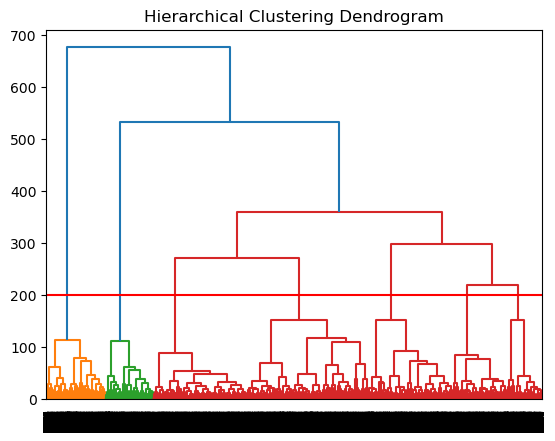

In [8]:
# Plot a Dendogram
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hierarchical, truncate_mode="level", p=50)
plt.axhline(y = 200, color = 'r', linestyle = '-')
plt.show()

In [9]:
# Add a column to the dataset using aAgglomerative clustering with 7 clusters
customer_info_final['cluster_ward'] = AgglomerativeClustering(
    linkage='ward', n_clusters=7).fit_predict(customer_info_scaled)

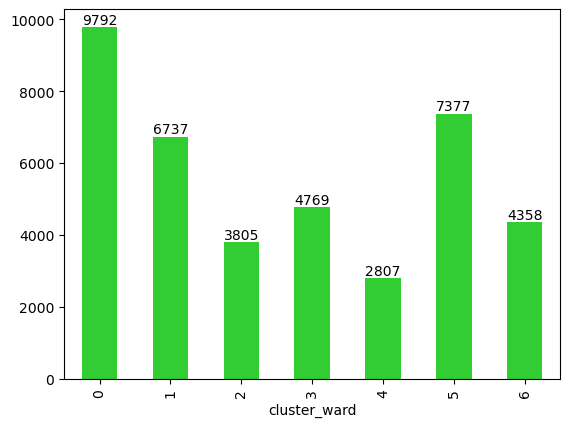

In [11]:
# Group the data by cluster and calculate the size of each group
cluster_counts = customer_info_final.groupby('cluster_ward').size()

# Create a bar plot
ax = cluster_counts.plot(kind='bar', color='limegreen')

for i, count in enumerate(cluster_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()

### UMAP

UMAP, also known as Uniform Manifold Approximation Projection, was utilized as a visualization technique to represent the computed clusters.

In [12]:
# Save the clusters labels
ward_cluster = customer_info_final['cluster_ward']

In [13]:
# Initialize a UMAP object
umap_object = umap.UMAP(n_neighbors=500, min_dist=0.8, random_state=42)

In [14]:
# Fit the UMAP object to the scaled data and transform it
umap_embedding = umap_object.fit_transform(customer_info_scaled)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


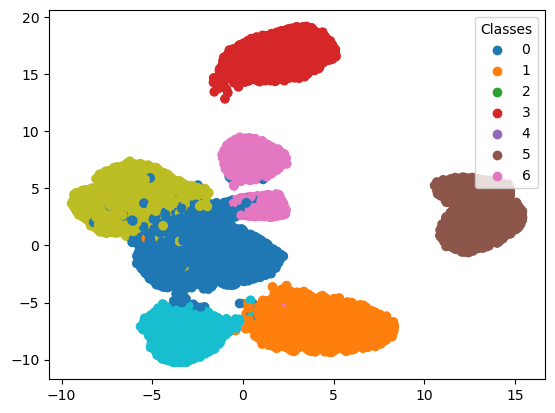

In [15]:
# Visualize the result
visualize_dimensionality_reduction(umap_embedding, np.array(ward_cluster))